In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호를 자동으로 '-'로 치환하여 마이너스 기호가 깨지는 것을 방지

In [60]:
X = np.load('./data/X.npy')
y = np.load('./data/Y.npy')

In [88]:
X.shape # 5547(사진 개수) * 50(가로 픽셀) * 50(세로 픽셀) * 3(RGB) 차원인 사진 데이터

(5547, 50, 50, 3)

reshape() : 배열과 차원을 변형해주는 함수


-  np.reshape(변경할 배열, 차원)

-  배열.reshape(차원)

In [82]:
# 배열을 (5547 * 7500) 2차원으로 축소
X_reshape = np.reshape(X, (5547, 50*50*3))
X_reshape.shape

(5547, 7500)

In [62]:
# X_reshape의 요소(feature)를 2개로 감소시키는 PCA
pca = PCA(n_components=2)


In [64]:
X_pca = pca.fit_transform(X_reshape) # 변형하면서 동시에 학습시킴

In [90]:
X_pca.shape

(5547, 2)

In [66]:
# 데이터프레임으로 만들고 y를 class열에 추가
X_df = pd.DataFrame(data = X_pca, columns = ['PCA1', 'PCA2'])
X_df['class'] = y

<Axes: xlabel='PCA1', ylabel='PCA2'>

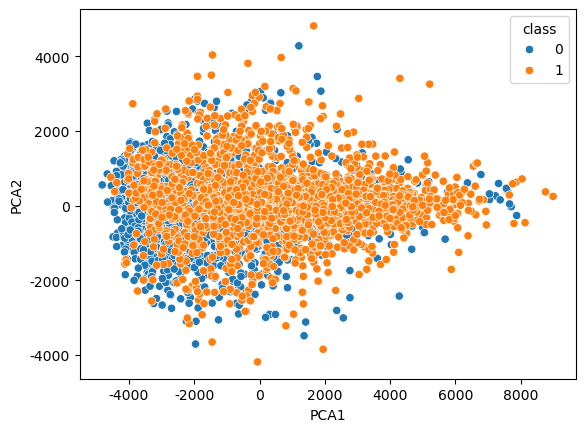

In [67]:
# 그래프 그리기
sns.scatterplot(X_df, x='PCA1', y ='PCA2', hue=X_df['class'])

In [75]:
# 요소 20개로 
pca = PCA(n_components=20)
X_pca2 = pca.fit_transform(X_reshape)

In [76]:
# 데이터를 학습용 데이터와 테스트용 데이터로 분류함
X_train, X_test, y_train, y_test = train_test_split(X_pca2, y, test_size=.2)

In [77]:
# 학습모델 가져오기
gb = GradientBoostingClassifier(n_estimators=1000, max_depth=3, learning_rate=.1, random_state=12345)

In [78]:
# 학습시키기
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=12345)

In [80]:
# 학습 데이터에서의 정확도
gb.score(X_train, y_train)

0.9779130042821726

In [81]:
# 테스트 데이터를 썼을때의 정확도
gb.score(X_test, y_test)

0.7711711711711712